In [1]:
import xarray as xr
import matplotlib.pyplot as plt

from utils.data import load_xval_test_set

In [12]:
ds = xr.open_dataset('/net/argon/landclim/kraftb/machflow_engression/combined_results.zarr')

/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [14]:
ds.Qmm_mod.encoding

{'chunks': (1, 1, 1, 100, 245, 1000),
 'preferred_chunks': {'beta': 1,
  'esl': 1,
  'nl': 1,
  'member': 100,
  'station': 245,
  'time': 1000},
 'compressor': None,
 'filters': None,
 '_FillValue': nan,
 'dtype': dtype('float32')}

In [33]:
ds = load_xval_test_set('/net/argon/landclim/kraftb/machflow_engression/runs_timesplit/beta0.33_esl001_nl005/xval').sel(time=slice('2018', '2019'))

In [24]:
ds = xr.open_dataset('/net/argon/landclim/kraftb/machflow_engression/runs_timesplit/combined.zarr')
ds = ds.where(ds.folds > 0, drop=True)

/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


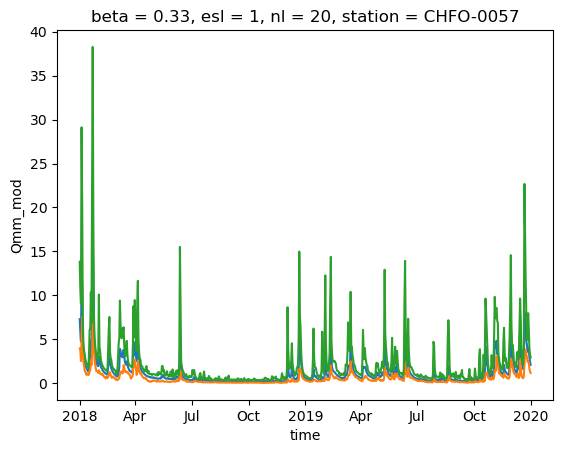

In [23]:
ds.isel(beta=0, esl=0, nl=0, station=0).Qmm_mod.median('member').plot()
ds.isel(beta=0, esl=0, nl=0, station=0).Qmm_mod.min('member').plot()
ds.isel(beta=0, esl=0, nl=0, station=0).Qmm_mod.max('member').plot()

In [15]:
(ds.folds.values > 0).sum()

85

In [13]:
ds = xr.open_dataset('/net/argon/landclim/kraftb/machflow_engression/runs_expectiles/default/xval/fold_000/preds.zarr').sel(time='2018')

/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/kraftb/.conda/envs/engression/lib/python3.10/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


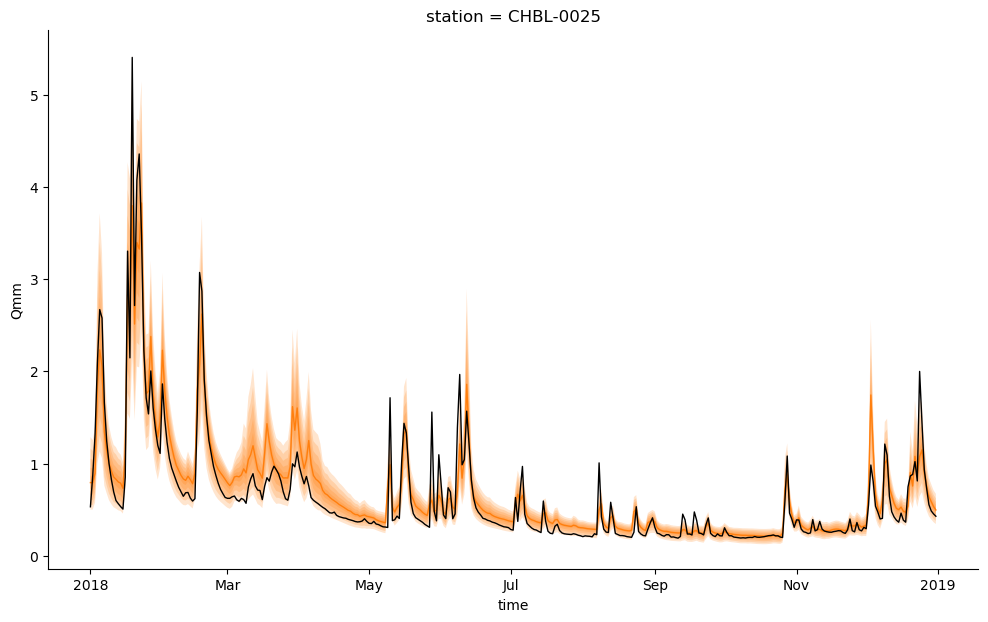

In [81]:
fig, ax = plt.subplots(figsize=(12, 7))

i = 117

for m in np.arange(0, 0.5, 0.1):
    ax.fill_between(
        ds.time,
        ds.sel(member=m, method='nearest').isel(station=i).Qmm_mod,
        ds.sel(member=1.0-m, method='nearest').isel(station=i).Qmm_mod,
        ec='none', fc='tab:orange', alpha=0.2)

ds.isel(station=i).sel(member=0.5).Qmm_mod.plot(ax=ax, color='tab:orange', linewidth=1)
ds.isel(station=i).Qmm.plot(ax=ax, color='k', linewidth=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


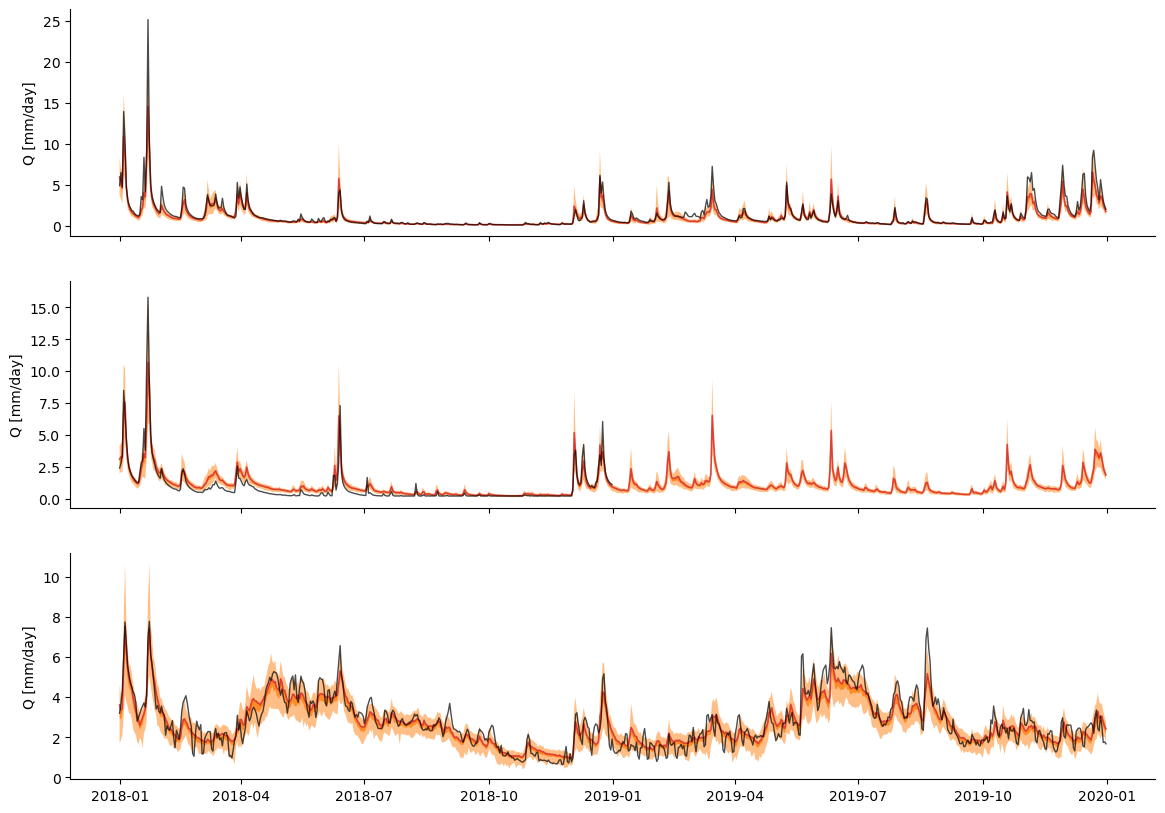

In [52]:
sites = [0, 110, 200]

fig, axes = plt.subplots(len(sites), figsize=(14, 10), sharex=True)

for s, ax in zip(sites, axes):

    ax.plot(ds.time, ds.isel(station=s).Qmm, color='k', lw=1., zorder=12, alpha=0.7)

    ax.plot(ds.time, ds.isel(station=s).Qmm_mod.median('member'), lw=1.2, zorder=10, color='tab:red', alpha=0.8)
    ax.fill_between(ds.time, ds.isel(station=s).Qmm_mod.quantile(0.01, 'member'), ds.isel(station=s).Qmm_mod.quantile(0.90, 'member'), ec='none', alpha=0.5, zorder=8, fc='tab:orange')
    ax.fill_between(ds.time, ds.isel(station=s).Qmm_mod.quantile(0.25, 'member'), ds.isel(station=s).Qmm_mod.quantile(0.5, 'member'), ec='none', alpha=0.8, zorder=8, fc='tab:orange')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_ylabel('Q [mm/day]')